In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
people_df = pd.read_csv('people.csv')
act_train_df = pd.read_csv('act_train.csv')


In [10]:
people_df.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [11]:
#colsWithNas = ['char_1','char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8','char_9']

#for _, col in enumerate(colsWithNas):
 #   act_train_df[col] = act_train_df[col].fillna('-') 

All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

People_df contains characteristics of each person. Act_train contains activities that were initiated, but not neccesarily completed. Each activity contains id for the person, activity category, charactersitcs about that activity, as well as whether the activity was completed or not.

The goal is predict the outcome of the actitity -- either 0 or 1.





Drop columns that won't likely be helpful



In [12]:
people_df = people_df.drop(['date'], axis=1)
act_train_df = act_train_df.drop(['date', 'activity_id'], axis=1)


Rename char variables so they don't conflict with each other when we join the dataframes.



In [13]:
import re
p = re.compile('^char')

def renameCharColumns(colName, prpnd):
    if p.match(colName) != None:
        return prpnd + '_' + colName
    else:
        return colName

people_df.columns = [renameCharColumns(colName, prpnd='people') for colName in people_df.columns]
act_train_df.columns = [renameCharColumns(colName, prpnd='act') for colName in act_train_df.columns]

Joined the dataframes on the people_id column

In [14]:
joined_df = act_train_df.merge(people_df, on='people_id', )
joined_df = joined_df.drop('people_id', axis=1)

One hot encode activity_category column

In [15]:
#act_category_dummies = pd.get_dummies(joined_df['activity_category'], prefix='act_cat')
#act_category_dummies.head()
#joined_df = joined_df.join(act_category_dummies)
#joined_df = joined_df.drop('activity_category', axis=1)
#joined_df.head()

Convert boolean columns to 1's and 0's

In [16]:
joined_df['people_char_4'].unique()
joined_df.dtypes

boolCols = ['people_char_10', 'people_char_11',
       'people_char_12', 'people_char_13', 'people_char_14', 'people_char_15',
       'people_char_16', 'people_char_17', 'people_char_18', 'people_char_19',
       'people_char_20', 'people_char_21', 'people_char_22', 'people_char_23',
       'people_char_24', 'people_char_25', 'people_char_26', 'people_char_27',
       'people_char_28', 'people_char_29', 'people_char_30', 'people_char_31',
       'people_char_32', 'people_char_33', 'people_char_34', 'people_char_35',
       'people_char_36', 'people_char_37']

joined_df[boolCols] = joined_df[boolCols].astype('int')
joined_df.dtypes

activity_category    object
act_char_1           object
act_char_2           object
act_char_3           object
act_char_4           object
act_char_5           object
act_char_6           object
act_char_7           object
act_char_8           object
act_char_9           object
act_char_10          object
outcome               int64
people_char_1        object
group_1              object
people_char_2        object
people_char_3        object
people_char_4        object
people_char_5        object
people_char_6        object
people_char_7        object
people_char_8        object
people_char_9        object
people_char_10        int64
people_char_11        int64
people_char_12        int64
people_char_13        int64
people_char_14        int64
people_char_15        int64
people_char_16        int64
people_char_17        int64
people_char_18        int64
people_char_19        int64
people_char_20        int64
people_char_21        int64
people_char_22        int64
people_char_23      

Convert people_char_1 to binary feature, as there are only two possible values

In [17]:
def convertPeopleChar1(val):
    if val == 'type 1':
        return 0
    else:
        return 1

joined_df['people_char_1'] = joined_df['people_char_1'].apply(convertPeopleChar1)
joined_df.shape

(2197291, 51)

Save to disk so we can start here in future work

In [18]:
#joined_df.to_csv('clean.csv', index=False)


## Explore

Read in saved/cleaned csv

In [19]:
#clean = pd.read_csv('clean.csv')
#clean.info()

In [20]:
#clean[clean['activity_category'] == 'type 1'].head()
#clean.shape

Convert remaining categorical features to categories

In [21]:
catCols = ['people_char_1', 'activity_category', 'group_1', 'people_char_2', 'people_char_3',
       'people_char_4', 'people_char_5', 'people_char_6', 'people_char_7',
       'people_char_8', 'people_char_9', 'act_char_1', 'act_char_2', 'act_char_3',
       'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10']

for _, col in enumerate(catCols):
    joined_df[col] = joined_df[col].astype('category')
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 51 columns):
activity_category    category
act_char_1           category
act_char_2           category
act_char_3           category
act_char_4           category
act_char_5           category
act_char_6           category
act_char_7           category
act_char_8           category
act_char_9           category
act_char_10          category
outcome              int64
people_char_1        category
group_1              category
people_char_2        category
people_char_3        category
people_char_4        category
people_char_5        category
people_char_6        category
people_char_7        category
people_char_8        category
people_char_9        category
people_char_10       int64
people_char_11       int64
people_char_12       int64
people_char_13       int64
people_char_14       int64
people_char_15       int64
people_char_16       int64
people_char_17       int64
people_char_18

In [22]:
joined_df['outcome'].mean()


0.4439543965728709

People completed 43% of the activities they started



### Activity_Category



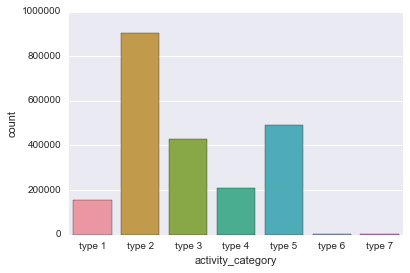

In [23]:
sns.countplot(x="activity_category", data=joined_df)

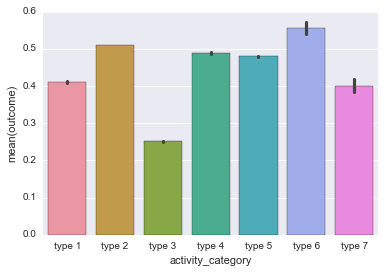

In [24]:
sns.barplot(x="activity_category", y="outcome", data=joined_df)

Observations

There are very few observations that fall into the type 6 and type 7 categories. Type 2 is bar far the most frequent category. Type 3 activities seem to covert less frequently.

### Act_char_1-9

In [29]:
typeOneActs = joined_df[joined_df['activity_category'] == 'type 1']


Index(['activity_category', 'act_char_1', 'act_char_2', 'act_char_3',
       'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9', 'act_char_10', 'outcome', 'people_char_1', 'group_1',
       'people_char_2', 'people_char_3', 'people_char_4', 'people_char_5',
       'people_char_6', 'people_char_7', 'people_char_8', 'people_char_9',
       'people_char_10', 'people_char_11', 'people_char_12', 'people_char_13',
       'people_char_14', 'people_char_15', 'people_char_16', 'people_char_17',
       'people_char_18', 'people_char_19', 'people_char_20', 'people_char_21',
       'people_char_22', 'people_char_23', 'people_char_24', 'people_char_25',
       'people_char_26', 'people_char_27', 'people_char_28', 'people_char_29',
       'people_char_30', 'people_char_31', 'people_char_32', 'people_char_33',
       'people_char_34', 'people_char_35', 'people_char_36', 'people_char_37',
       'people_char_38'],
      dtype='object')

In [33]:
actOneThroughNine = ['act_char_1', 'act_char_2', 'act_char_3',
       'act_char_4', 'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8',
       'act_char_9']

for _, col in enumerate(actOneThroughNine):
    print('Column: {}, Unique Values: {} \n'.format(col, typeOneActs[col].unique()))

Column: act_char_1, Unique Values: [type 3, type 36, type 24, type 2, type 5, ..., type 44, type 50, type 48, type 52, type 45]
Length: 51
Categories (51, object): [type 3, type 36, type 24, type 2, ..., type 50, type 48, type 52, type 45] 

Column: act_char_2, Unique Values: [type 5, type 11, type 6, type 2, type 1, ..., type 23, type 28, type 31, type 32, type 30]
Length: 32
Categories (32, object): [type 5, type 11, type 6, type 2, ..., type 28, type 31, type 32, type 30] 

Column: act_char_3, Unique Values: [type 1, type 5, type 6, type 3, type 7, ..., type 4, type 9, type 2, type 10, type 11]
Length: 11
Categories (11, object): [type 1, type 5, type 6, type 3, ..., type 9, type 2, type 10, type 11] 

Column: act_char_4, Unique Values: [type 1, type 3, type 2, type 4, type 6, type 5, type 7]
Categories (7, object): [type 1, type 3, type 2, type 4, type 6, type 5, type 7] 

Column: act_char_5, Unique Values: [type 6, type 1, type 5, type 2, type 4, type 3, type 7]
Categories (7, obj

Some of these features have lots of unique values. Not sure how to gain intuition for them.

### Act_char_10

In [35]:
joined_df['act_char_10'].unique()

[type 76, type 1, type 1727, type 894, type 143, ..., type 8359, type 6787, type 7356, type 6865, type 7379]
Length: 6516
Categories (6515, object): [type 76, type 1, type 1727, type 894, ..., type 6787, type 7356, type 6865, type 7379]

There are 6500 different possible values of this variable

In [37]:
groupedByFeature = joined_df.groupby('act_char_10')
rates = groupedByFeature.apply(lambda x: x.outcome.mean())
counts = groupedByFeature.apply(lambda x: x.shape[0])
ratesAndCountsDf = pd.DataFrame({'rate': rates, 'count': counts})
ratesAndCountsDf.sort_values(by='count', ascending=False, inplace=True)
ratesAndCountsDf.reset_index(inplace=True)

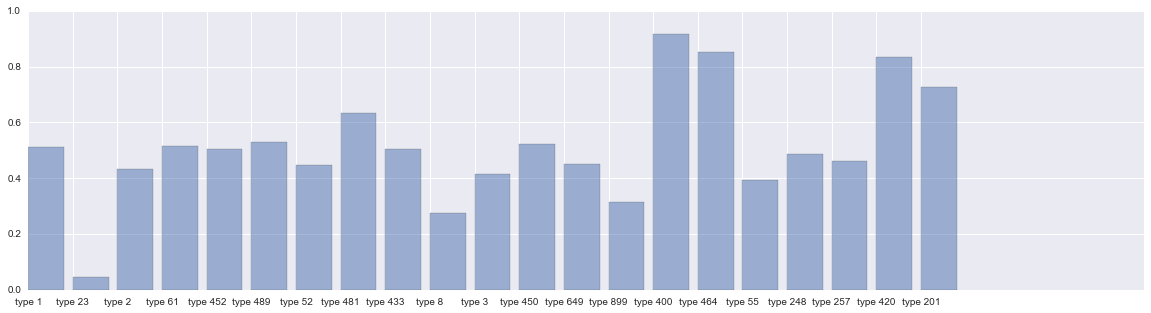

In [91]:
top20 = ratesAndCountsDf[0:21]
y_pos = range((top20.shape[0]))
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

ax.bar(y_pos, top20['rate'], alpha=0.5)
plt.xticks(y_pos, top20['act_char_10'])
plt.show()


It looks like type 23, the second most frequent act_char_10 values, has a very low conversion rate.

In [92]:
top20

,act_char_10,count,rate
0,type 1,904683,0.510324
1,type 23,200408,0.046231
2,type 2,116191,0.434569
3,type 61,35417,0.513906
4,type 452,23513,0.505635
5,type 489,23471,0.530740
6,type 52,19515,0.446631
7,type 481,18019,0.633276
8,type 433,17282,0.503298
9,type 8,16112,0.276192
